In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Real_Estate_Analysis.xlsx')
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [4]:
df.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


<AxesSubplot:xlabel='price', ylabel='sqft_living'>

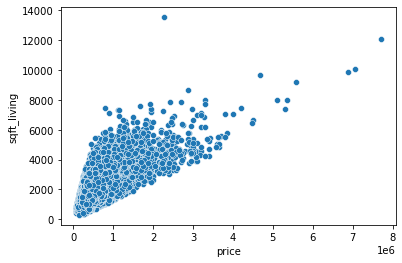

In [5]:
sns.scatterplot(x ='price', y='sqft_living', data=df)

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

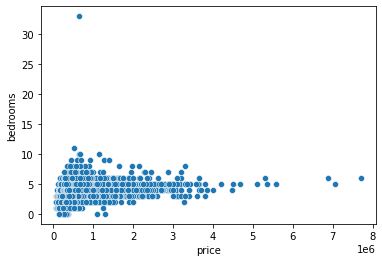

In [6]:
sns.scatterplot(x ='price', y='bedrooms', data=df)

<AxesSubplot:xlabel='price', ylabel='bathrooms'>

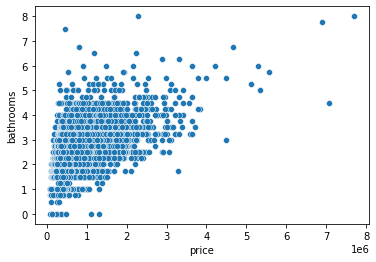

In [7]:
sns.scatterplot(x ='price', y='bathrooms', data=df)

<AxesSubplot:xlabel='price', ylabel='floors'>

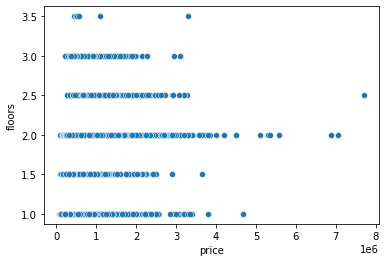

In [8]:
sns.scatterplot(x ='price', y='floors', data=df)

<AxesSubplot:>

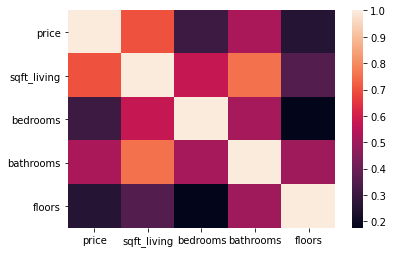

In [9]:
sns.heatmap(df.corr())

<AxesSubplot:ylabel='sqft_living'>

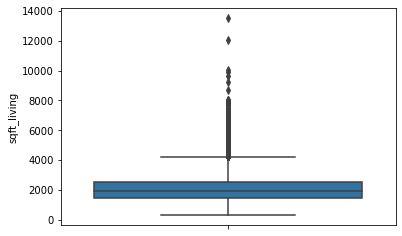

In [10]:
sns.boxplot(y = df['sqft_living'])

<AxesSubplot:ylabel='bedrooms'>

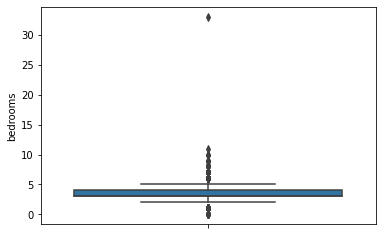

In [11]:
sns.boxplot(y = df['bedrooms'])

<AxesSubplot:ylabel='bathrooms'>

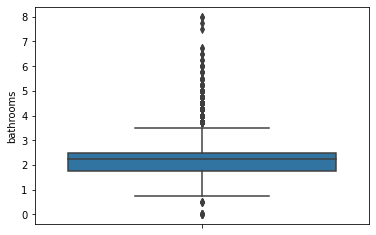

In [12]:
sns.boxplot(y = df['bathrooms'])

<AxesSubplot:ylabel='floors'>

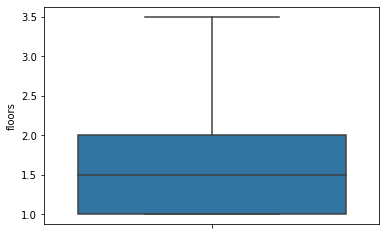

In [13]:
sns.boxplot(y = df['floors'])

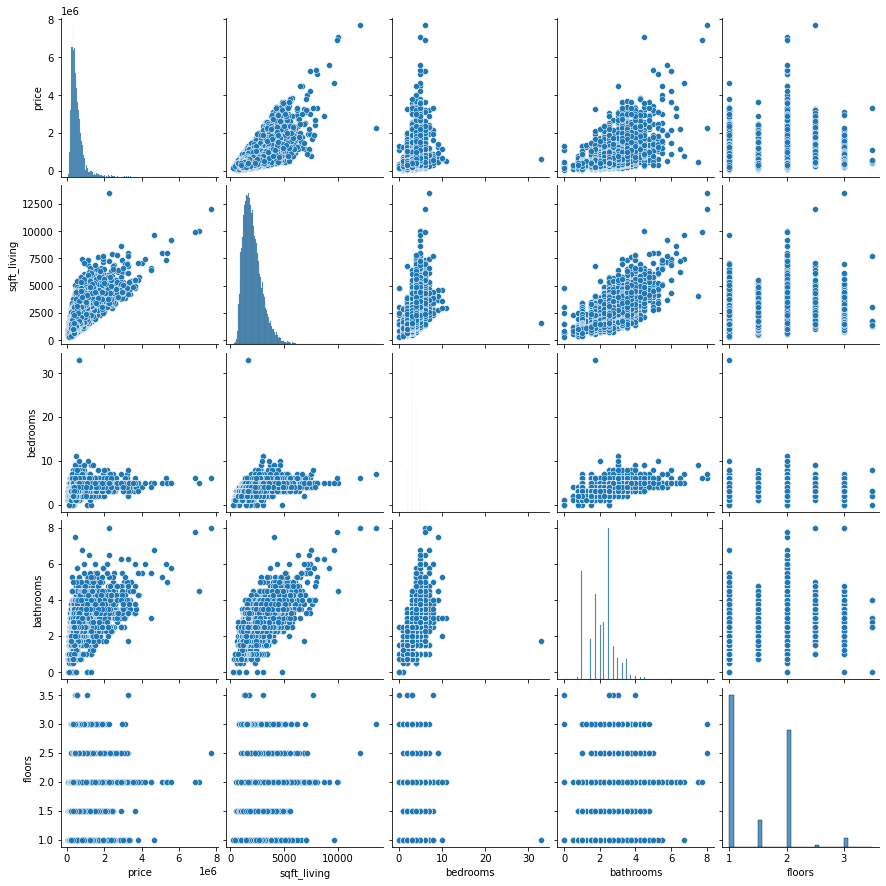

In [14]:
sns.pairplot(df)

**Sqft basis**

In [15]:
Y= df.iloc[0:,:1]
X = df.iloc[0:,1:2]

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state = 0)

In [17]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [18]:
linreg.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = linreg.predict(x_test)

*Estimate the cost on the basis of sqft_living*

In [20]:
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r_square = r2_score(y_test, y_pred)

In [22]:
print('The RMSE value is: ', RMSE)
print('The R-square value is: ', r_square)

The RMSE value is:  248879.06143647005
The R-square value is:  0.47915770799654944


**bedrooms basis**

In [23]:
Y= df.iloc[0:,:1]
X = df.iloc[0:,2:3]

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state = 0)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

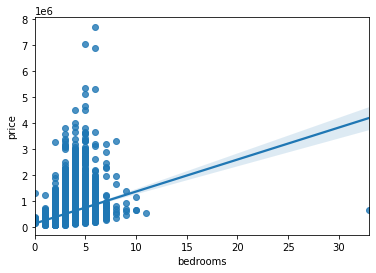

In [25]:
sns.regplot(x= x_train, y=y_train)

In [26]:
linreg.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred = linreg.predict(x_test)

*Estimate on the basis of bedrooms*

In [28]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r_square = r2_score(y_test, y_pred)

In [29]:
print('The RMSE value is: ', RMSE)
print('The R-square value is: ', r_square)

The RMSE value is:  330690.0478733202
The R-square value is:  0.08045757572566958


**bathrooms basis**

In [30]:
Y= df.iloc[0:,:1]
X = df.iloc[0:,3:-1]

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state = 0)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

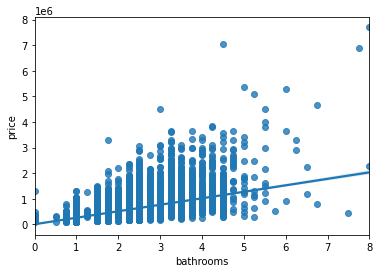

In [32]:
sns.regplot(x= x_train, y=y_train, marker='o')

In [33]:
linreg.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred = linreg.predict(x_test)

*Estimate on the basis of bathrooms*

In [35]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r_square = r2_score(y_test, y_pred)

In [36]:
print('The RMSE value is: ', RMSE)
print('The R-square value is: ', r_square)

The RMSE value is:  293733.11471464526
The R-square value is:  0.27450346627286937


**floor basis**

In [37]:
Y= df.iloc[0:,:1]
X = df.iloc[0:,-1:]

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state = 0)

<AxesSubplot:xlabel='floors', ylabel='price'>

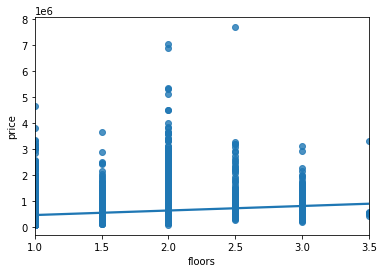

In [39]:
sns.regplot(x= x_train, y=y_train, marker='o')

In [40]:
linreg.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred = linreg.predict(x_test)

*Estimate on the basis of bathrooms*

In [42]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r_square = r2_score(y_test, y_pred)

In [43]:
print('The RMSE value is: ', RMSE)
print('The R-square value is: ', r_square)

The RMSE value is:  332722.4842926506
The R-square value is:  0.0691197399920428


***On the basis of individual values we can clearly see that the models are performing bad. Now creating a multiple linear regression model***

In [44]:
Y= df.iloc[0:,:1]
X = df.iloc[0:,1:]

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state = 0)

In [46]:
mul_reg = LinearRegression()

In [47]:
mul_reg.fit(x_train, y_train)

LinearRegression()

In [48]:
y_pred = mul_reg.predict(x_test)

*Estimate on the basis of all the features*

In [49]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r_square = r2_score(y_test, y_pred)

In [50]:
print('The RMSE value for multiple regression is: ', RMSE)
print('The R-square value for multiple regression is is: ', r_square)

The RMSE value for multiple regression is:  244892.3041280654
The R-square value for multiple regression is is:  0.4957106510447711


In [51]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
df2 =sc.fit_transform(df)
df2

array([[-0.86671733, -0.97983502, -0.39873715, -1.44746357, -0.915427  ],
       [-0.00568792,  0.53363434, -0.39873715,  0.1756067 ,  0.93650577],
       [-0.98084935, -1.42625404, -1.47395936, -1.44746357, -0.915427  ],
       ...,
       [-0.37586519, -1.15404732, -1.47395936, -1.77207762,  0.93650577],
       [-0.38158814, -0.52252773, -0.39873715,  0.50022075,  0.93650577],
       [-0.58588173, -1.15404732, -1.47395936, -1.77207762,  0.93650577]])

In [52]:
df2 = pd.DataFrame(df2, columns= df.columns)

In [53]:
Y= df2.iloc[0:,:1]
X = df2.iloc[0:,1:]

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state = 0)

In [55]:
mul_reg = LinearRegression()

In [56]:
mul_reg.fit(x_train, y_train)

LinearRegression()

In [57]:
y_pred = mul_reg.predict(x_test)

*Estimate on the basis of all the features after Standardization*

In [58]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r_square = r2_score(y_test, y_pred)

In [59]:
print('The RMSE value for multiple regression is: ', RMSE)
print('The R-square value for multiple regression is is: ', r_square)

The RMSE value for multiple regression is:  0.6670657265592046
The R-square value for multiple regression is is:  0.49571065104476697
